In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data1 = "resources/data.csv"
data1_data = pd.read_csv(data1)

In [52]:
#display data for reference

df = data1_data.head()
df

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Business characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-06,Canada,2016A000011124,All industries,Number of businesses needing Personal protecti...,Number,223,units,0,v1206121238,1.1.1,385709.0,A,NaN,NaN,0
1,2020-06,Canada,2016A000011124,All industries,Number of businesses not needing Personal prot...,Number,223,units,0,v1206121239,1.1.2,91734.0,C,NaN,NaN,0
2,2020-06,Canada,2016A000011124,All industries,Number of businesses that don't know if they n...,Number,223,units,0,v1206121240,1.1.3,0.0,A,NaN,NaN,0
3,2020-06,Canada,2016A000011124,All industries,Number of employees on payroll pre-COVID,Number,223,units,0,v1206121241,1.1.4,6235293.0,A,NaN,NaN,0
4,2020-06,Canada,2016A000011124,All industries,Average percentage of full-time employees,Percent,239,units,0,v1206121242,1.1.5,67.1,A,NaN,NaN,2


In [59]:
#data cleaning #1, select relevant rows for study

df.iloc[0:4]

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Business characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-06,Canada,2016A000011124,All industries,Number of businesses needing Personal protecti...,Number,223,units,0,v1206121238,1.1.1,385709.0,A,NaN,NaN,0
1,2020-06,Canada,2016A000011124,All industries,Number of businesses not needing Personal prot...,Number,223,units,0,v1206121239,1.1.2,91734.0,C,NaN,NaN,0
2,2020-06,Canada,2016A000011124,All industries,Number of businesses that don't know if they n...,Number,223,units,0,v1206121240,1.1.3,0.0,A,NaN,NaN,0
3,2020-06,Canada,2016A000011124,All industries,Number of employees on payroll pre-COVID,Number,223,units,0,v1206121241,1.1.4,6235293.0,A,NaN,NaN,0


In [67]:
#data cleaning #2, cut unimportant columns and rows, renamed headers

summary = df.drop(columns=["GEO", "DGUID", "North American Industry Classification System (NAICS)", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"])
summary.rename(columns={"REF_DATE": "Date", "Business characteristics": "Description"}, inplace=True)
summary.drop(4,axis=0,inplace=True)
summary


,Date,Description,UOM,VALUE
0,2020-06,Number of businesses needing Personal protecti...,Number,385709.0
1,2020-06,Number of businesses not needing Personal prot...,Number,91734.0
2,2020-06,Number of businesses that don't know if they n...,Number,0.0
3,2020-06,Number of employees on payroll pre-COVID,Number,6235293.0


<AxesSubplot:ylabel='Total'>

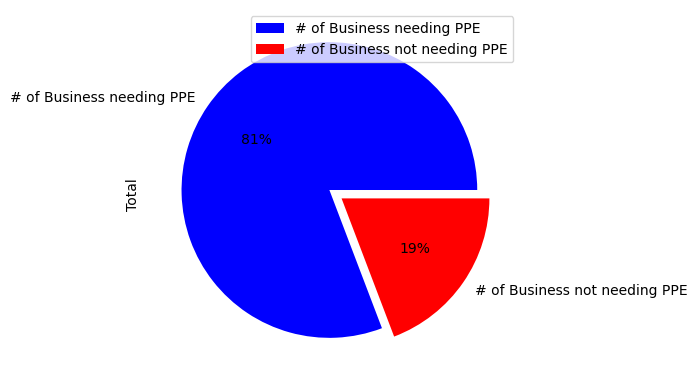

In [74]:
#matplotlib pie chart creation with effects
#show the percentage of businesses who need and dont need PPE as per Canadian government regulation

business_ppe_demand = pd.DataFrame({'Description': ['# of Business needing PPE', 
                                         '# of Business not needing PPE'],
                                        'Total':[385709, 91734]})

colors = ['blue', 'red']

explode = (0.05, 0.05)

business_ppe_demand.groupby(['Description']).sum().plot(
    kind='pie', y='Total', autopct='%1.0f%%',
    colors=colors, explode=explode)

In [84]:
#final summary
#display total number of employees who need and don't need PPE to work

summary_df = pd.DataFrame({"Number of employees on payroll pre-COVID": ["6,235,293"],
                          "# of Business needing PPE": [6235293*.81],
                          "# of Business not needing PPE": [6235293*.19]})
pd.options.display.float_format = '{:,}'.format
summary_df

,Number of employees on payroll pre-COVID,# of Business needing PPE,# of Business not needing PPE
0,"6,235,293","5,050,587.33","1,184,705.67"


In [ ]:
#conclusion: out of the total number of employees employed during the pandemic, approx. 5m need PPE to work (onsite), and approx. 1.2m people dont need PPE to work (remote and etc)